In [1]:
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Function for the trapezoidal rule
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])

# Function definitions for the integrals
def f1(x):
    return np.exp(-x**2)

def f2(x):
    return np.exp(x) * np.cos(4 * x)

# Exact solutions
I_exact_1 = np.sqrt(np.pi) / 2 * special.erf(1)
I_exact_2 = (1/17) * (-1 + np.exp(np.pi))
# Evaluate the integrals for n = 4, 8, 16
n_values = [4, 8, 16]
results_1 = []
results_2 = []
errors_1 = []
errors_2 = []

for n in n_values:
    I_n_1 = trapezoidal_rule(f1, 0, 1, n)
    I_n_2 = trapezoidal_rule(f2, 0, np.pi, n)
    results_1.append(I_n_1)
    results_2.append(I_n_2)
    errors_1.append(abs(I_n_1 - I_exact_1))
    errors_2.append(abs(I_n_2 - I_exact_2))
    
# Create a DataFrame for each integral
df1 = pd.DataFrame({
    'n': n_values,
    'I_n for 1': results_1,
    'I for 1': [I_exact_1] * len(n_values),
    'Error': errors_1
})

df2 = pd.DataFrame({
    'n': n_values,
    'I_n for 2': results_2,
    'I for 2': [I_exact_2] * len(n_values),
    'Error': errors_2
})

# Display the DataFrames
print("Results for the integral of e^-x^2 from 0 to 1")
display(df1)
print("Results for the integral of e^x cos(4x) from 0 to π")
display(df2)

Results for the integral of e^-x^2 from 0 to 1


,n,I_n for 1,I for 1,Error
0,4,0.742984,0.746824,0.003840
1,8,0.745866,0.746824,0.000959
2,16,0.746585,0.746824,0.000240


Results for the integral of e^x cos(4x) from 0 to π


,n,I_n for 2,I for 2,Error
0,4,3.249050,1.302394,1.946657
1,8,1.624525,1.302394,0.322132
2,16,1.375723,1.302394,0.073329


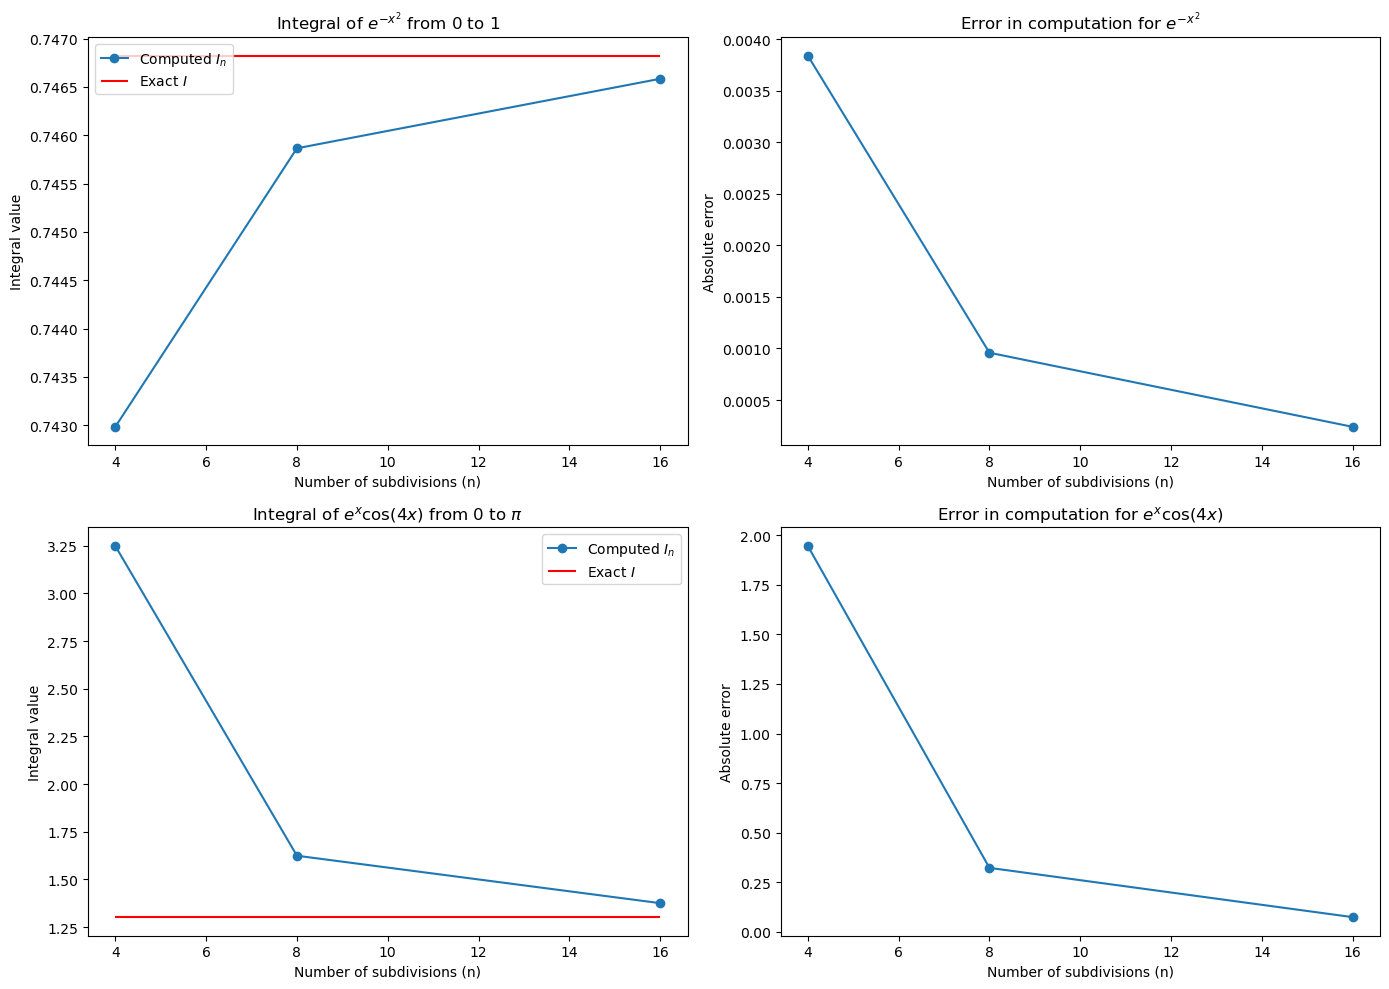

In [3]:
# Plotting results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ax[0, 0].plot(n_values, results_1, 'o-', label='Computed $I_n$')
ax[0, 0].hlines(I_exact_1, n_values[0], n_values[-1], colors='r', label='Exact $I$')
ax[0, 0].set_title('Integral of $e^{-x^2}$ from 0 to 1')
ax[0, 0].set_xlabel('Number of subdivisions (n)')
ax[0, 0].set_ylabel('Integral value')
ax[0, 0].legend()

ax[0, 1].plot(n_values, errors_1, 'o-')
ax[0, 1].set_title('Error in computation for $e^{-x^2}$')
ax[0, 1].set_xlabel('Number of subdivisions (n)')
ax[0, 1].set_ylabel('Absolute error')

ax[1, 0].plot(n_values, results_2, 'o-', label='Computed $I_n$')
ax[1, 0].hlines(I_exact_2, n_values[0], n_values[-1], colors='r', label='Exact $I$')
ax[1, 0].set_title('Integral of $e^x \cos(4x)$ from 0 to $\pi$')
ax[1, 0].set_xlabel('Number of subdivisions (n)')
ax[1, 0].set_ylabel('Integral value')
ax[1, 0].legend()

ax[1, 1].plot(n_values, errors_2, 'o-')
ax[1, 1].set_title('Error in computation for $e^x \cos(4x)$')
ax[1, 1].set_xlabel('Number of subdivisions (n)')
ax[1, 1].set_ylabel('Absolute error')

plt.tight_layout()
plt.show()

In [4]:
# Calculate the rate of convergence based on the textbook method
R_n1 = (results_1[1] - results_1[0]) / (results_1[2] - results_1[1])
R_n2 = (results_2[1] - results_2[0]) / (results_2[2] - results_2[1])

# Assuming the rate is calculated as the logarithm of the ratio
p1 = np.log2(np.abs(R_n1)) 
p2 = np.log2(np.abs(R_n2))

print("Rate of convergence for f1:", p1)
print("Rate of convergence for f2:", p2)

Rate of convergence for f1: 2.002801111401687
Rate of convergence for f2: 2.7069439468761702


In [5]:
# Define the functions from Problem 5
def f1(x):
    return np.exp(-x**2)

def f2(x):
    return np.exp(x) * np.cos(4*x)

# Gauss-Legendre Quadrature
def gauss_legendre_quadrature(f, a, b, n):
    [x, w] = np.polynomial.legendre.leggauss(n+1)
    # Transform the x values from [-1, 1] to [a, b]
    t = 0.5 * (x + 1) * (b - a) + a
    return np.sum(w * f(t)) * 0.5 * (b - a)

# Exact values from Problem 5
I_exact_1 = np.sqrt(np.pi) / 2 * special.erf(1)
I_exact_2 = 1/17 * (-1 + np.exp(np.pi))

# Evaluate the integrals for n = 4, 8, 16
n_values = [4, 8, 16]
results_1 = []
results_2 = []
errors_1 = []
errors_2 = []

for n in n_values:
    # Apply Gauss-Legendre quadrature
    I_gl_1 = gauss_legendre_quadrature(f1, 0, 1, n)
    I_gl_2 = gauss_legendre_quadrature(f2, 0, np.pi, n)
    results_1.append(I_gl_1)
    results_2.append(I_gl_2)
    errors_1.append(abs(I_gl_1 - I_exact_1))
    errors_2.append(abs(I_gl_2 - I_exact_2))
    
# Create a DataFrame for each integral
df1 = pd.DataFrame({
    'n': n_values,
    'I_n for 1': results_1,
    'I for 1': [I_exact_1] * len(n_values),
    'Error': errors_1
})

df2 = pd.DataFrame({
    'n': n_values,
    'I_n for 2': results_2,
    'I for 2': [I_exact_2] * len(n_values),
    'Error': errors_2
})

# Display the DataFrames
print("Results for the integral of e^-x^2 from 0 to 1")
display(df1)
print("Results for the integral of e^x cos(4x) from 0 to π")
display(df2)

Results for the integral of e^-x^2 from 0 to 1


,n,I_n for 1,I for 1,Error
0,4,0.746824,0.746824,6.046179e-09
1,8,0.746824,0.746824,0.000000e+00
2,16,0.746824,0.746824,1.110223e-16


Results for the integral of e^x cos(4x) from 0 to π


,n,I_n for 2,I for 2,Error
0,4,1.146206,1.302394,1.561873e-01
1,8,1.302392,1.302394,1.831402e-06
2,16,1.302394,1.302394,2.176037e-14


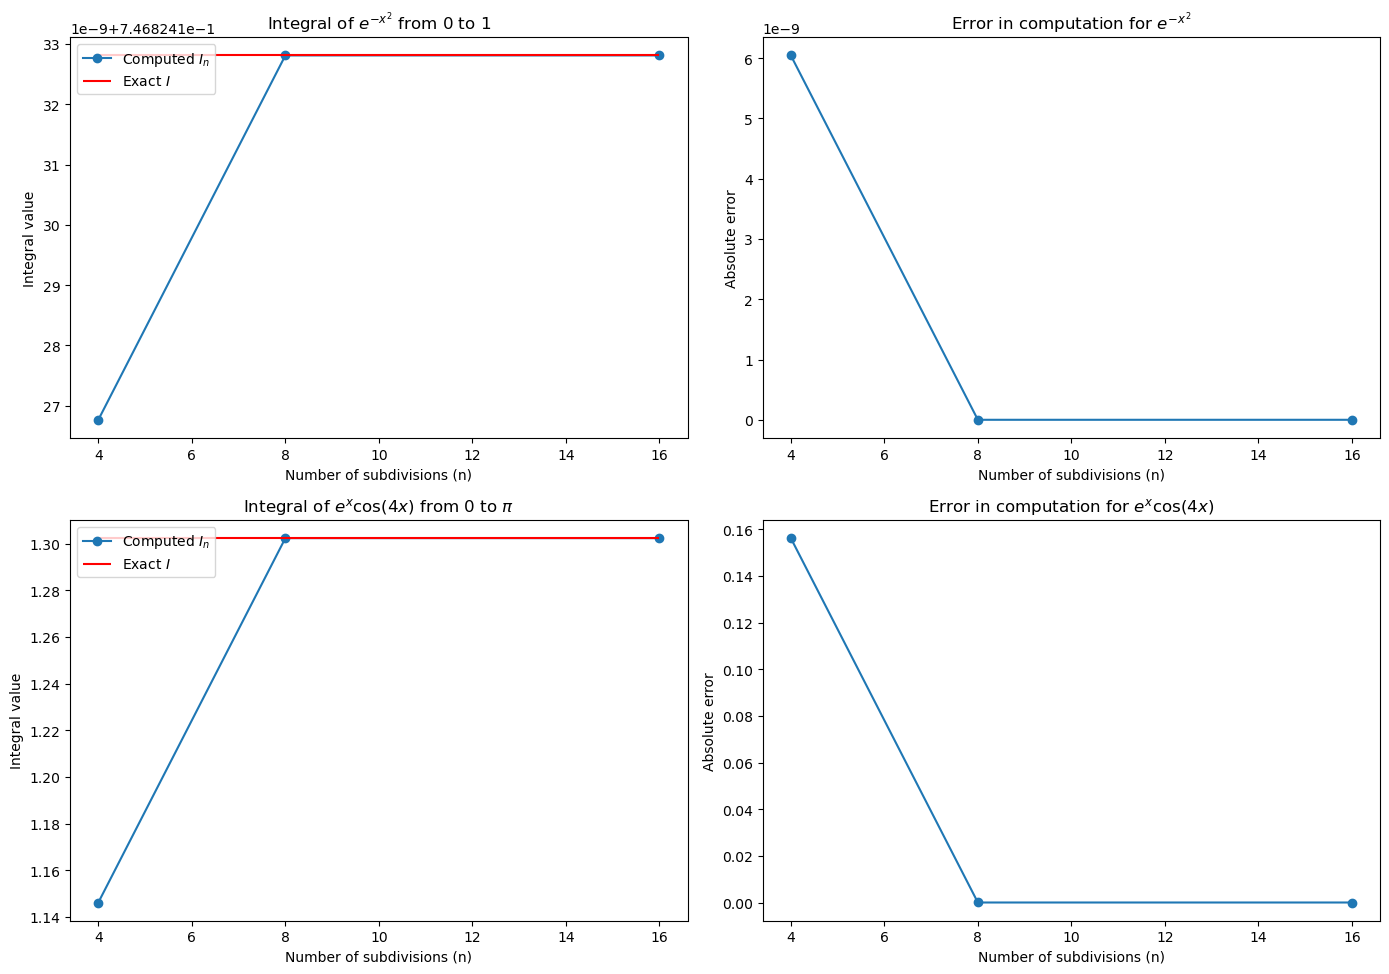

In [6]:
# Plotting results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ax[0, 0].plot(n_values, results_1, 'o-', label='Computed $I_n$')
ax[0, 0].hlines(I_exact_1, n_values[0], n_values[-1], colors='r', label='Exact $I$')
ax[0, 0].set_title('Integral of $e^{-x^2}$ from 0 to 1')
ax[0, 0].set_xlabel('Number of subdivisions (n)')
ax[0, 0].set_ylabel('Integral value')
ax[0, 0].legend()

ax[0, 1].plot(n_values, errors_1, 'o-')
ax[0, 1].set_title('Error in computation for $e^{-x^2}$')
ax[0, 1].set_xlabel('Number of subdivisions (n)')
ax[0, 1].set_ylabel('Absolute error')

ax[1, 0].plot(n_values, results_2, 'o-', label='Computed $I_n$')
ax[1, 0].hlines(I_exact_2, n_values[0], n_values[-1], colors='r', label='Exact $I$')
ax[1, 0].set_title('Integral of $e^x \cos(4x)$ from 0 to $\pi$')
ax[1, 0].set_xlabel('Number of subdivisions (n)')
ax[1, 0].set_ylabel('Integral value')
ax[1, 0].legend()

ax[1, 1].plot(n_values, errors_2, 'o-')
ax[1, 1].set_title('Error in computation for $e^x \cos(4x)$')
ax[1, 1].set_xlabel('Number of subdivisions (n)')
ax[1, 1].set_ylabel('Absolute error')

plt.tight_layout()
plt.show()